# **PYTHON FOR DATA ANALYSIS**

Seoul_Bike_Sharing_Demand_Dataset_Analysis

Ryan MAKOUANGOU | Clémence MILLET | Antoine MAUVOISIN


## Context

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. 

(source: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand#)

## PREREQUISITES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
sns.set(rc={'figure.figsize':(11.7,8.27)})
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor



import joblib


## Dataset Loading

In [2]:
df = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')

## STEP 1 : Data Pre-Processing

Firstly, let's explore the dataset and its values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [5]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


Let's verify if there is any missing or duplicated values.

In [7]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
df.duplicated().sum()

0

There are no null nor duplicated values. Hence we don't need to make imputation on the dataset !

Data Encoding 

Datetime Datas

In [9]:
df['Date']=df['Date'].astype(str)
df['Hour']=df['Hour'].astype(str)
df['Full Date']=df[['Hour','Date']].apply(' '.join,axis=1)
df['Full Date']=pd.to_datetime(df['Full Date'],format="%H %d/%m/%Y")
df['Full Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8760 entries, 0 to 8759
Series name: Full Date
Non-Null Count  Dtype         
--------------  -----         
8760 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 68.6 KB


In [10]:
df['Full Date'].sample(n=5)

3641   2018-05-01 17:00:00
5388   2018-07-13 12:00:00
891    2018-01-07 03:00:00
2055   2018-02-24 15:00:00
4821   2018-06-19 21:00:00
Name: Full Date, dtype: datetime64[ns]

## STEP 2 : Data Visualizations

Let's focus on the column rainfall and its impact on the Dataset

In [11]:
rain_mean = df.groupby('Rainfall(mm)').mean()['Rented Bike Count']

Text(0, 0.5, 'Mean of rented bikes per hour')

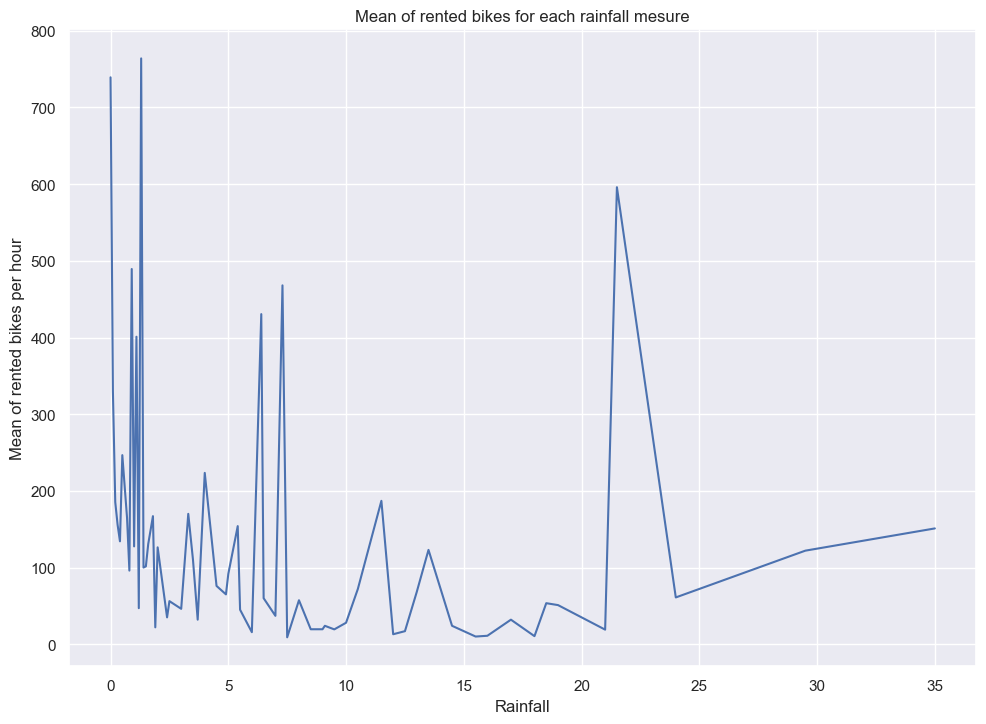

In [12]:
plt.plot(rain_mean)
plt.title('Mean of rented bikes for each rainfall mesure')
plt.xlabel('Rainfall')
plt.ylabel('Mean of rented bikes per hour')

Odly, there is an average of more than 500 bikes rented for a high index of rainfall, between 20 and 25mm.

In [13]:
rain_mean.tail(5)

Rainfall(mm)
21.0     19.0
21.5    596.0
24.0     61.0
29.5    122.0
35.0    151.0
Name: Rented Bike Count, dtype: float64

For 21.5 mm we have an average of almost 600 bikes rented per hour in Seoul. Even for 35mm, which is the highest index, there's an average of 151 bikes rented per hour.

In [14]:
df[df['Rainfall(mm)']>20]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Full Date
3997,16/05/2018,151,13,21.8,97,2.4,682,21.2,0.06,35.0,0.0,Spring,No Holiday,Yes,2018-05-16 13:00:00
5034,28/06/2018,596,18,20.6,97,0.7,222,20.1,0.14,21.5,0.0,Summer,No Holiday,Yes,2018-06-28 18:00:00
5132,02/07/2018,61,20,23.5,97,0.1,1814,22.9,0.04,24.0,0.0,Summer,No Holiday,Yes,2018-07-02 20:00:00
6501,28/08/2018,122,21,22.9,98,2.1,1146,22.5,0.00,29.5,0.0,Summer,No Holiday,Yes,2018-08-28 21:00:00
6524,29/08/2018,19,20,23.4,98,0.6,70,23.0,0.00,21.0,0.0,Summer,No Holiday,Yes,2018-08-29 20:00:00


After selecting only the hour where rainfall is over 20mm we can observe that the average values that we saw just before, each stem from only one value in fact.

As we can see, these intense rains occur in summer with temperature above 20°C and doesn't seam to last long since we don't have these high values on a same day.

What is the number of days when it is raining and not raining ?

In [15]:
rain = df[['Rainfall(mm)','Full Date']]

In [16]:
rain['Rainfall(mm)'] = rain['Rainfall(mm)'].map(lambda x : 'No Rain' if x == 0.0 else 'Rain')

In [17]:
rain_count = rain.groupby('Rainfall(mm)').count()
rain_count

,Full Date
Rainfall(mm),
No Rain,8232
Rain,528


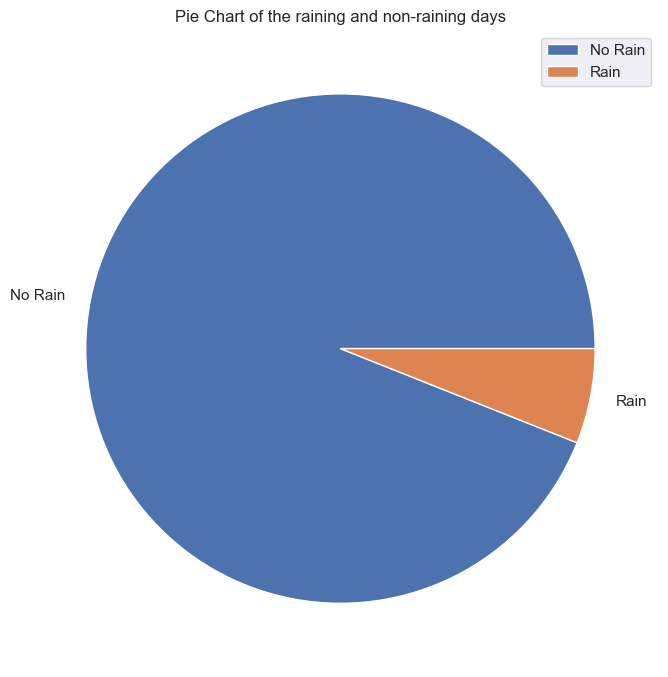

In [18]:
plt.pie(rain_count['Full Date'], labels = rain_count.index)
plt.title('Pie Chart of the raining and non-raining days')
plt.legend();

There are 15x more days when it's not raining compared to when it is

Let's look into the number of rented bikes according to the rainfall in Seoul.

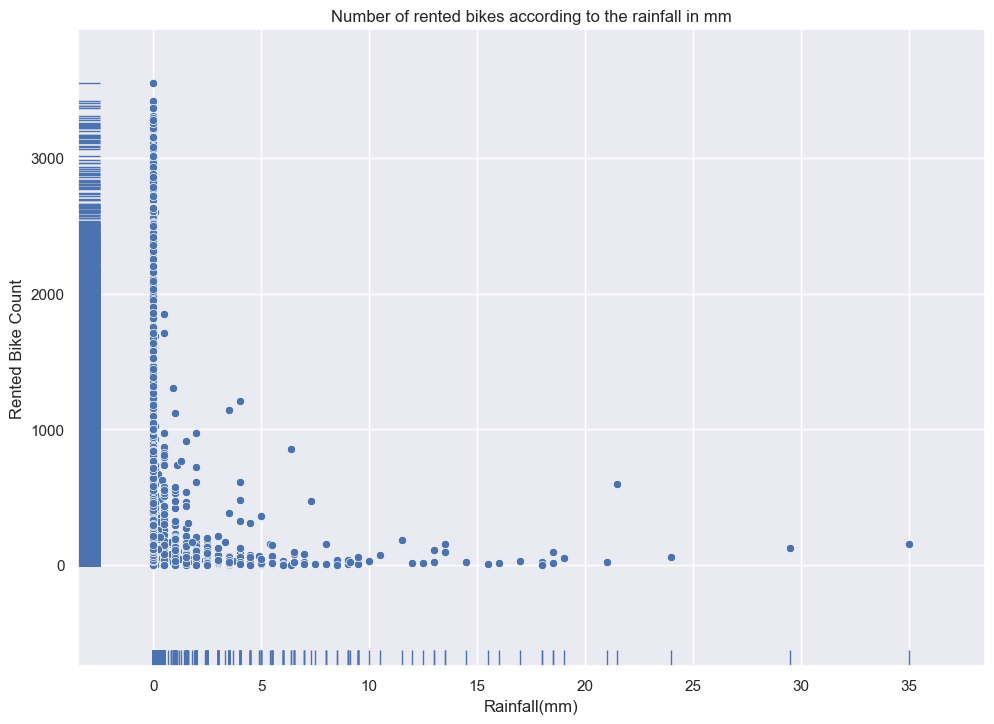

In [19]:
sns.scatterplot(data=df, x="Rainfall(mm)", y="Rented Bike Count")
sns.rugplot(data=df, x="Rainfall(mm)", y="Rented Bike Count")
plt.title('Number of rented bikes according to the rainfall in mm');

This graph shows there are way more bikes rented when it is not raining compared to when it is in total and we can also see that there are not many points where it is raining a lot.

Most raining hours don't go over 10 mm.

Let's focus on the column temperature

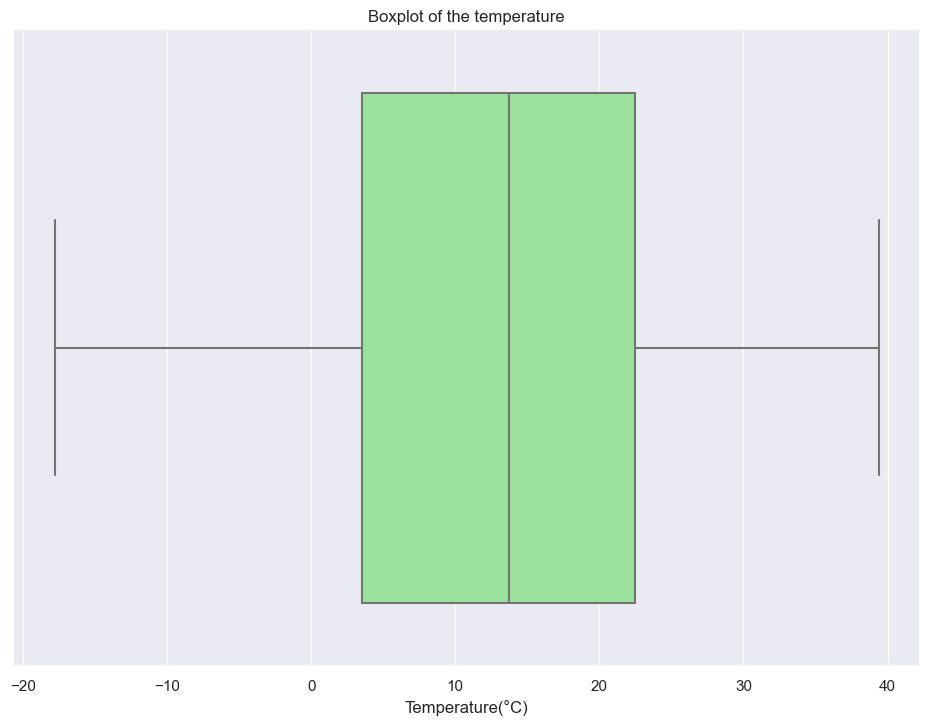

In [20]:
sns.boxplot(data=df, x='Temperature(°C)', color='lightgreen')
plt.title('Boxplot of the temperature');

We can observe that the temperature varition is not too extreme it can go doxn to almost -10°C and up to 40°C but the majority of the time the temperature remains between 2°C and 22°C.

In [21]:
temp = df.sort_values('Temperature(°C)', ascending = False)[['Temperature(°C)','Rented Bike Count']]

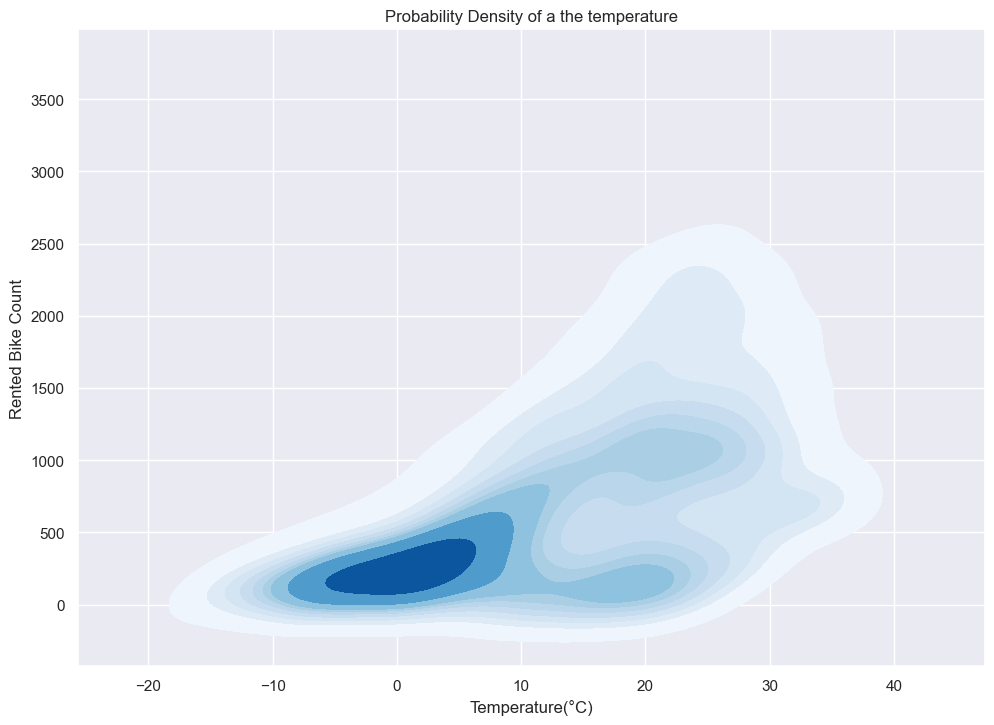

In [22]:
sns.kdeplot(temp['Temperature(°C)'], temp['Rented Bike Count'],
            color='b', shade=True,
            cmap="Blues", shade_lowest=False)
plt.title('Probability Density of a the temperature');

According to this graph, the case we observe the most is low rental for low temperature

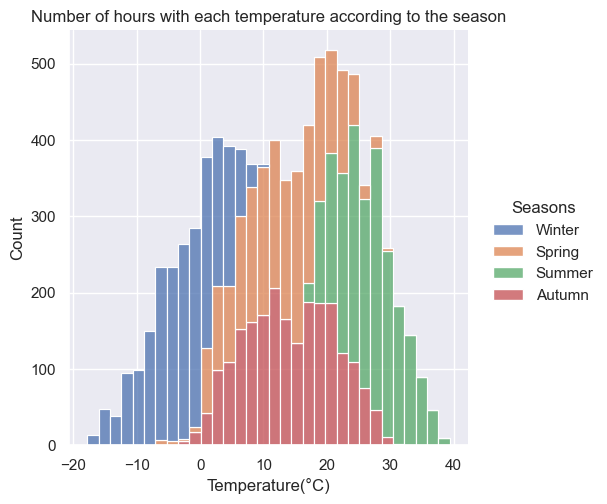

In [23]:
sns.set_palette('deep')
g = sns.displot(data=df, x="Temperature(°C)", hue="Seasons", multiple="stack")
plt.title("Number of hours with each temperature according to the season");

The temperature we get the most is between 20 and 25

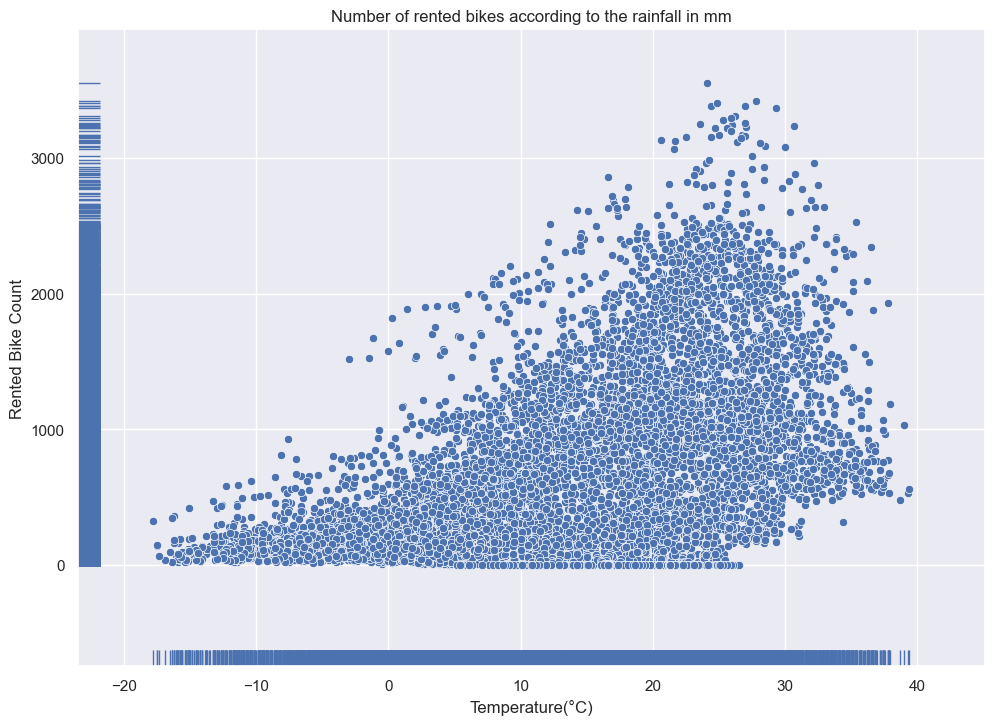

In [24]:
sns.scatterplot(data=df, x="Temperature(°C)", y="Rented Bike Count")
sns.rugplot(data=df, x="Temperature(°C)", y="Rented Bike Count")
plt.title('Number of rented bikes according to the rainfall in mm');

The higher the temperature, the higher the number of rented bikes. Are thoses two variables correlated ? Let's find out a with a correlation matrix.

CORRELATION MATRIX

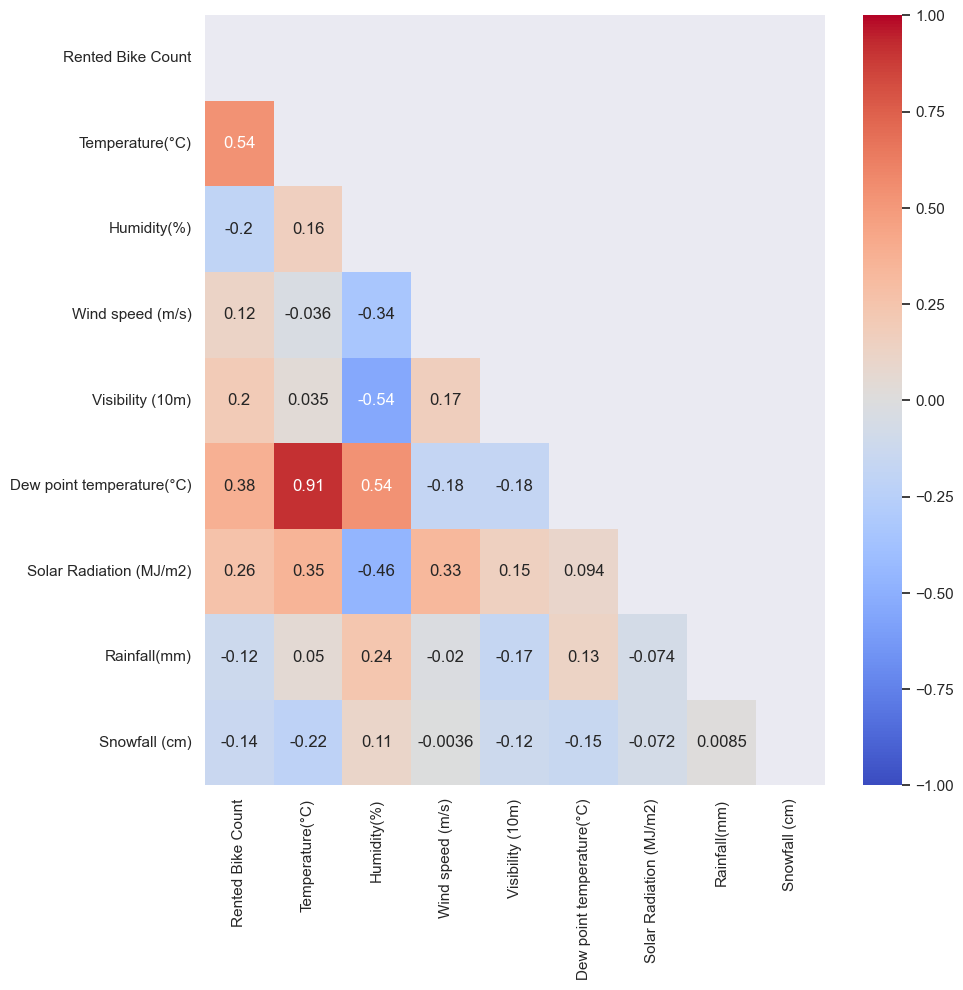

In [25]:
mask = np.zeros_like(df.corr('pearson'), dtype=np.bool);
mask[np.triu_indices_from(mask)] = True;
plt.figure(figsize=(10,10));
sns.heatmap(df.corr('pearson'),vmin=-1,vmax=1,cmap='coolwarm',annot=True,center=0,mask=mask);

As we can see, The Rented Bike Count variable is strongly correlated to the Temperature, which explains the previous chart.

Let's do an analyze holidays. First let's plot the number of bike rent during holidays and in the normal day 

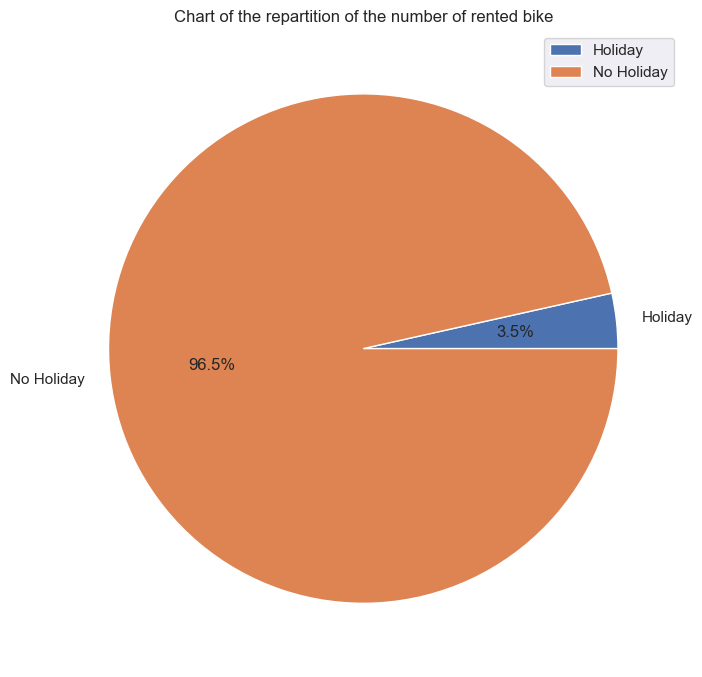

In [26]:
df.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(autopct='%1.1f%%');
plt.ylabel("");
plt.legend();
plt.title("Chart of the repartition of the number of rented bike");

This pie chart shows that mosts rented bikes are used outside Holiday days

However, we have to take into account that there is much more working days than holiday's.

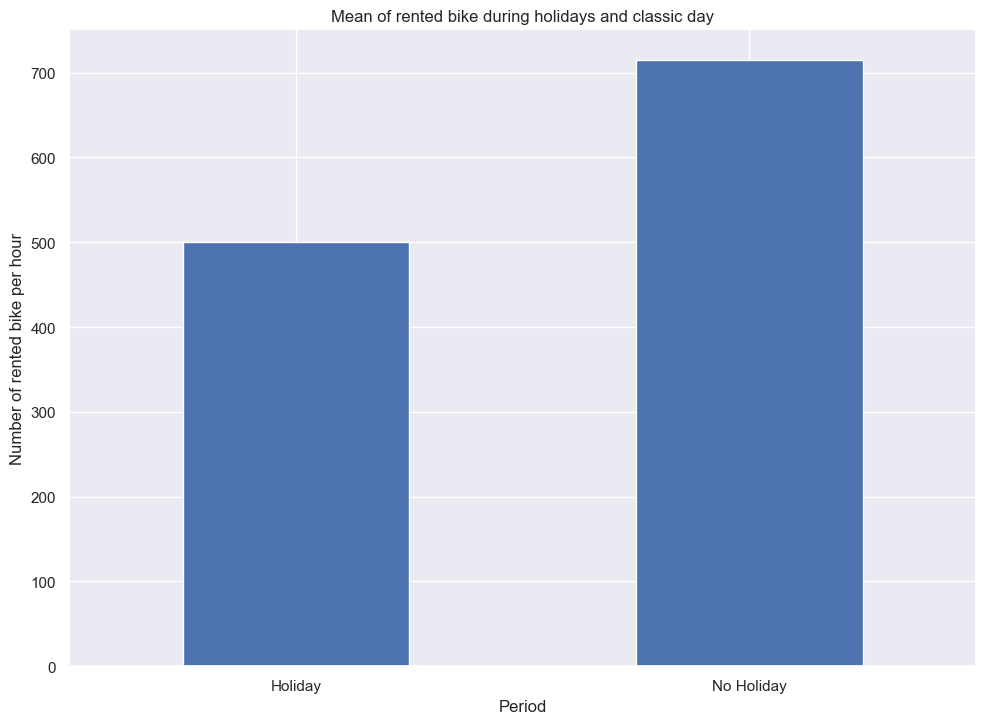

In [27]:
df.groupby('Holiday')['Rented Bike Count'].mean().plot.bar();
plt.xticks(rotation=360);
plt.title('Mean of rented bike during holidays and classic day');
plt.xlabel('Period');
plt.ylabel('Number of rented bike per hour');

We can observe that during holiday, the utilization of rented bikes are done by 40%.

Let's look if the number of bikes matched with each other

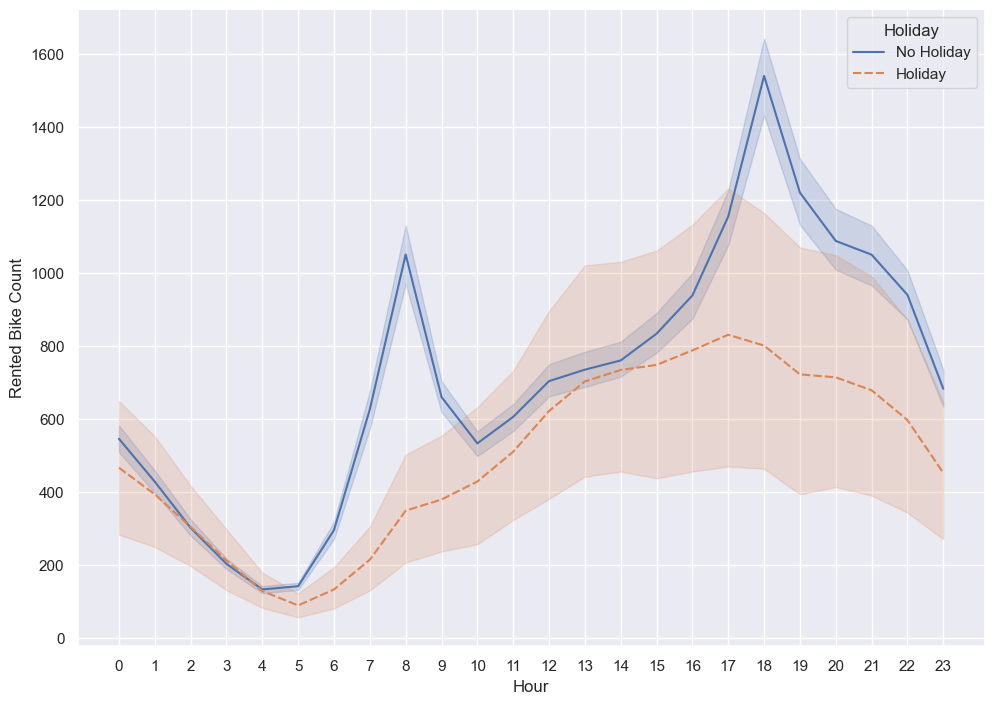

In [28]:
sns.lineplot(data=df, x="Hour", y="Rented Bike Count", style = 'Holiday', hue ='Holiday' );

There two spikes in the number of rented bikes during working days, but do they differ according to the season ?

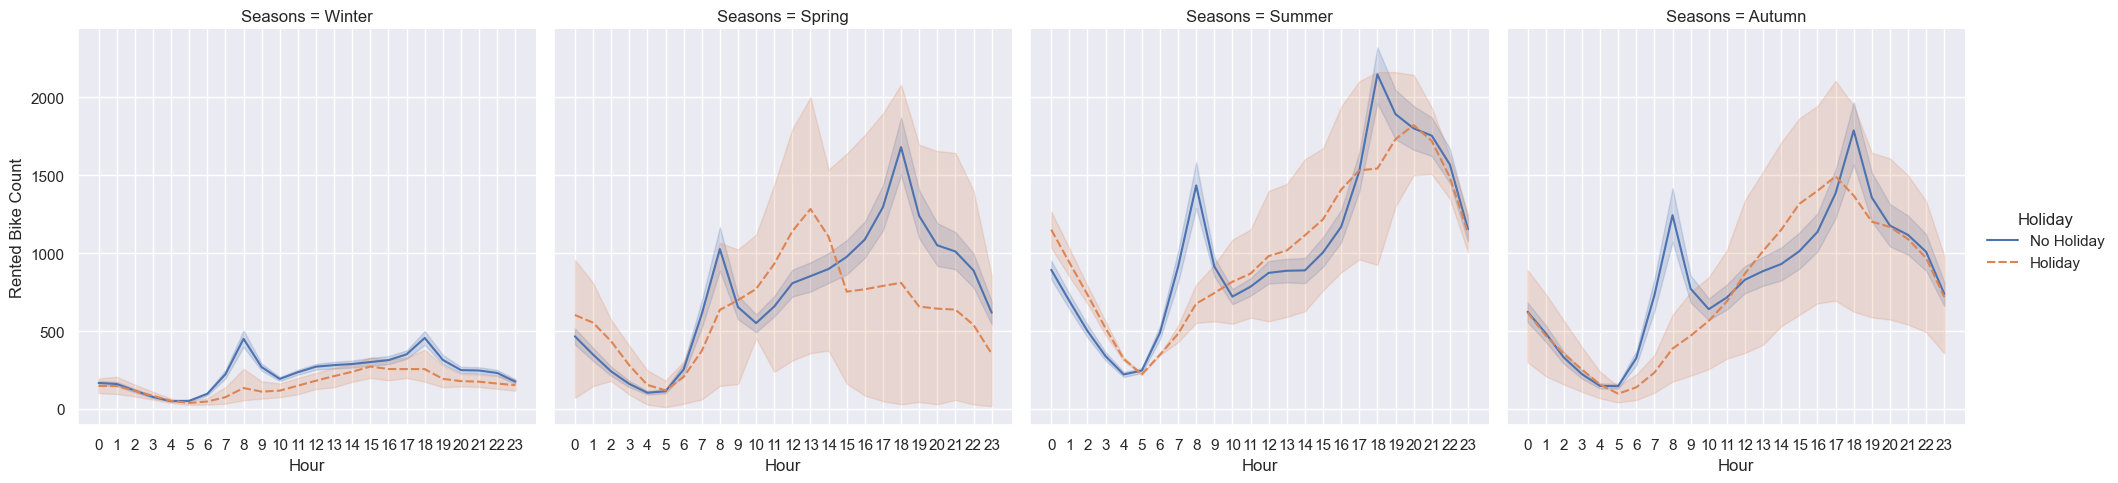

In [29]:
sns.relplot(
    data=df, x="Hour", y="Rented Bike Count", style = 'Holiday', hue ='Holiday',
    col="Seasons",
    kind="line"
);

As we can see, there is always a spike in the number of rented bikes whatever the season, which is around at 8 AM, and 6 PM.
We also notice that there is always the same curve of each visualizations.

However, it seems like the number of rented bikes during holidays are much more irregular depending the season and the hour.

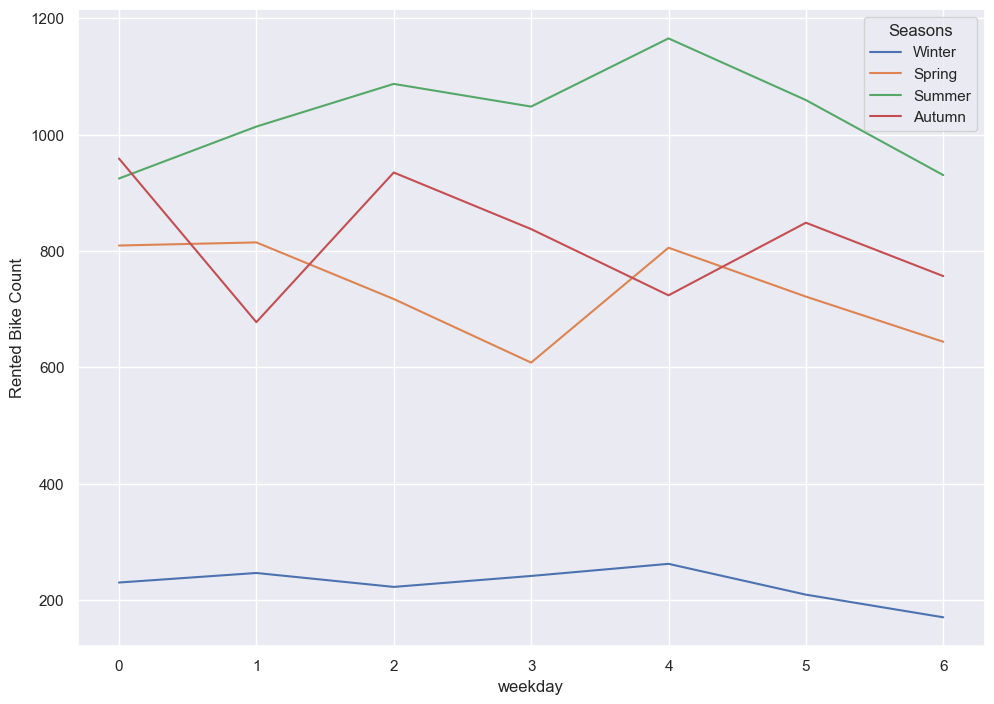

In [30]:
temp = df
temp["weekday"]=df['Full Date'].dt.weekday
sns.lineplot(data=temp, x="weekday", y="Rented Bike Count", hue='Seasons',ci=None);

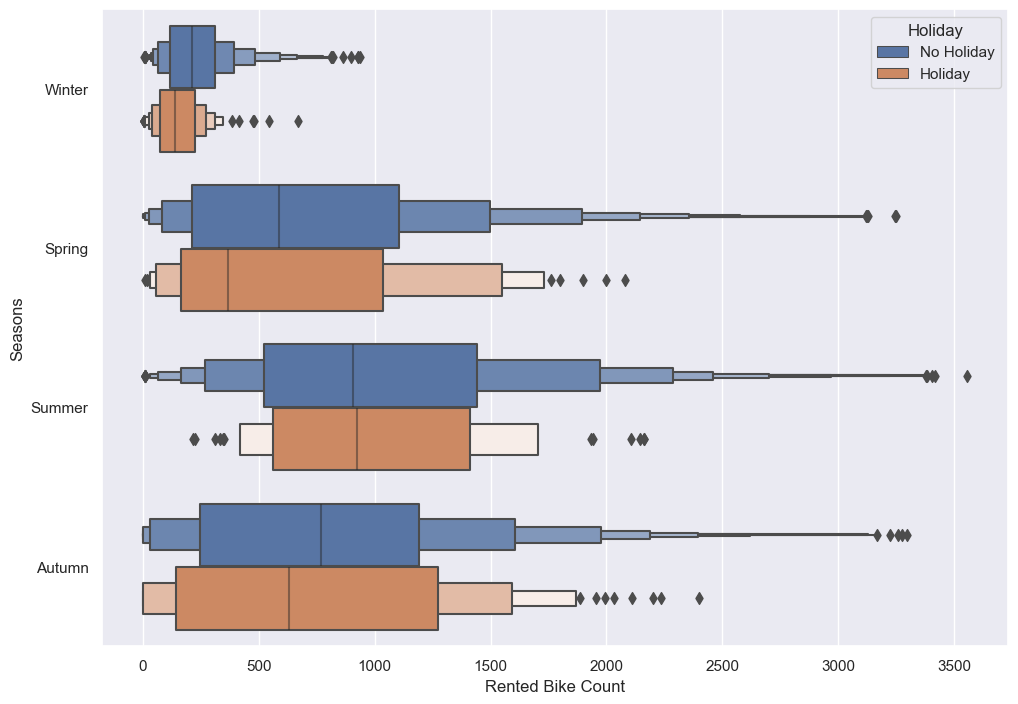

In [31]:
sns.boxenplot(data=df, x='Rented Bike Count', y='Seasons', hue = 'Holiday');

## **MODELING**

In [32]:
bikes = df.drop(['Functioning Day','Hour','Date', 'Full Date'], axis=1)
bikes['Seasons'] = bikes['Seasons'].map({'Spring' : 1, 'Summer' : 2, 'Autumn' : 3, 'Winter' : 4})
bikes['Holiday'] = bikes['Holiday'].map({'Holiday' : 1, 'No Holiday' : 0})

In [33]:
X = bikes.drop(['Rented Bike Count'], axis=1)
Y = bikes['Rented Bike Count']

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2)

In [35]:
print('train set', X_train.shape)
print('test set', X_test.shape)

train set (7008, 11)
test set (1752, 11)


Standardization of the data

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## SVR

In [37]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [38]:
model_svr = SVR()
model_svr.fit(X_train, Y_train)
svr_score=model_svr.score(X_test,Y_test)
model_svr.score(X_test,Y_test)

0.22835080946177544

In [39]:
param_grid = {'kernel' : ('linear','rbf'), 'C' : [1,100,500], 'gamma' : ('scale', 'auto'), 'epsilon' : [0.1,0.2,0.5]}
grid = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2')
model = grid.fit(X_train, Y_train)
grid.best_estimator_

SVR(C=500, epsilon=0.2, gamma='auto')

In [40]:
model = SVR(kernel = grid.best_estimator_.kernel, 
            C = grid.best_estimator_.C, 
            gamma = grid.best_estimator_.gamma,
            epsilon = grid.best_estimator_.epsilon)
model.fit(X_train, Y_train)
svr_score=model_svr.score(X_test,Y_test)
model.score(X_test,Y_test)

0.5491713291095249

In [41]:
joblib.dump(model, "svr.pkl")

['svr.pkl']

## Random Forest

In [42]:
model_rf = RandomForestRegressor(random_state = 10)
model_rf.fit(X_train, Y_train)
model_rf.score(X_test,Y_test)

0.6631779803375072

In [43]:
param_grid = {'n_estimators' : [x for x in np.arange(start=50,stop=150, step=10)], 
              'max_depth' : [x for x in np.arange(start=50,stop=100, step=10)], 
              'random_state' : [10]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2')
model = grid.fit(X_train, Y_train)
grid.best_estimator_

RandomForestRegressor(max_depth=50, n_estimators=140, random_state=10)

In [44]:
model_rf = RandomForestRegressor(n_estimators = grid.best_estimator_.n_estimators, 
                                 max_depth = grid.best_estimator_.max_depth, 
                                 random_state = 10)
model_rf.fit(X_train, Y_train)
rf_score=model_rf.score(X_test,Y_test)
model_rf.score(X_test,Y_test)

0.6634735154391265

In [45]:
joblib.dump(model_rf, "rf.pkl")

['rf.pkl']

## Linear Regression

In [46]:
model_lr = LinearRegression()
model_lr.fit(X_train,Y_train)
lr_score=model_lr.score(X_test,Y_test)
model_lr.score(X_test,Y_test)

0.38746351779142785

In [47]:
joblib.dump(model_lr, "lr.pkl")

['lr.pkl']

In [50]:
df['Month']=df['Full Date'].dt.month
selected_columns=['Rented Bike Count','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Seasons','Holiday','Hour','Month']
df_modeling=df[selected_columns]
df_modeling['Seasons'] = df_modeling['Seasons'].map({'Spring' : 1, 'Summer' : 2, 'Autumn' : 3, 'Winter' : 4})
df_modeling['Holiday'] = df_modeling['Holiday'].map({'Holiday' : 1, 'No Holiday' : 0})
df_modeling['Hour']=df_modeling['Hour'].astype(int)
X=df_modeling.drop(["Rented Bike Count"],axis=1)
Y=df_modeling["Rented Bike Count"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4)

## KNN

In [51]:
knn=KNeighborsRegressor(n_neighbors=5)
knn=knn.fit(X_train,Y_train)
score_knn=knn.score(X_test,Y_test)
score_knn

0.5168661288760494

In [52]:
knn=KNeighborsRegressor()
knn_param={'n_neighbors':(range(2,200))}
grid=GridSearchCV(knn,knn_param,scoring='r2',cv=5)
grid.fit(X_train,Y_train)
knn_2=grid.best_estimator_
knn_score=knn_2.score(X_test,Y_test)
knn_2.score(X_test,Y_test)


0.5216715904242695

In [53]:
knn_best_param=grid.best_params_
print(grid.best_params_)

{'n_neighbors': 6}


In [54]:
joblib.dump(knn, "knn.pkl")

['knn.pkl']

## RIDGE

In [55]:
ridge=Ridge()
ridge_param= {'alpha':(np.arange(38,200.0,1))}
grid = GridSearchCV(ridge,ridge_param,scoring='r2',cv=5)
grid.fit(X_train,Y_train)
ridge = grid.best_estimator_
ridge_score=ridge.score(X_test,Y_test)
ridge.score(X_test,Y_test)

0.47804482960610073

In [56]:
modelR = Ridge(alpha = grid.best_estimator_.alpha, )

In [57]:
ridge_best_param=grid.best_params_
print(grid.best_params_)

{'alpha': 38.0}


In [58]:
joblib.dump(modelR, "ridge.pkl")

['ridge.pkl']

## BAGGING

In [59]:
bagging=BaggingRegressor(n_estimators=10)
bagging=bagging.fit(X_train,Y_train)
print(bagging.score(X_test,Y_test))

0.7698053839208843


In [60]:
bagging=BaggingRegressor()
bagging_param={'n_estimators':(np.arange(0,50,1))}
grid=GridSearchCV(bagging,bagging_param,scoring='r2',cv=5,verbose=3)
grid.fit(X_train,Y_train)
bagging=grid.best_estimator_
bagging_score=bagging.score(X_test,Y_test)
print(bagging.score(X_test,Y_test))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ......................n_estimators=0;, score=nan total time=   0.0s
[CV 2/5] END ......................n_estimators=0;, score=nan total time=   0.0s
[CV 3/5] END ......................n_estimators=0;, score=nan total time=   0.0s
[CV 4/5] END ......................n_estimators=0;, score=nan total time=   0.0s
[CV 5/5] END ......................n_estimators=0;, score=nan total time=   0.0s
[CV 1/5] END ....................n_estimators=1;, score=0.552 total time=   0.0s
[CV 2/5] END ....................n_estimators=1;, score=0.633 total time=   0.0s
[CV 3/5] END ....................n_estimators=1;, score=0.610 total time=   0.0s
[CV 4/5] END ....................n_estimators=1;, score=0.457 total time=   0.0s
[CV 5/5] END ....................n_estimators=1;, score=0.543 total time=   0.0s
[CV 1/5] END ....................n_estimators=2;, score=0.691 total time=   0.0s
[CV 2/5] END ....................n_estimators=2

In [61]:
bagging_best_param=grid.best_params_
print(grid.best_params_)

{'n_estimators': 49}


In [62]:
modelbag = BaggingRegressor(n_estimators = grid.best_estimator_.n_estimators)

In [63]:
joblib.dump(modelbag, "bagging.pkl")

['bagging.pkl']

In [64]:
boost=xgb.XGBRegressor(n_estimators = 25)
boost=boost.fit(X_train,Y_train)
boost.score(X_test,Y_test)
print(boost.score(X_test,Y_test))

0.7849884216238567


In [65]:
boost=xgb.XGBRegressor()
boost_param={'n_estimators':(np.arange(0,25,1)),'max_depth':(np.arange(0,10,1))}
grid=GridSearchCV(boost,boost_param,scoring='r2',cv=5,verbose=3)
grid.fit(X_train,Y_train)
boost=grid.best_estimator_
boost_score=boost.score(X_test,Y_test)
print(boost.score(X_test,Y_test))

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
[CV 1/5] END ......max_depth=0, n_estimators=0;, score=-1.127 total time=   0.0s
[CV 2/5] END ......max_depth=0, n_estimators=0;, score=-1.146 total time=   0.0s
[CV 3/5] END ......max_depth=0, n_estimators=0;, score=-1.213 total time=   0.0s
[CV 4/5] END ......max_depth=0, n_estimators=0;, score=-1.242 total time=   0.0s
[CV 5/5] END ......max_depth=0, n_estimators=0;, score=-1.189 total time=   0.0s
[CV 1/5] END .........max_depth=0, n_estimators=1;, score=nan total time=   0.0s
[CV 2/5] END .........max_depth=0, n_estimators=1;, score=nan total time=   0.0s
[CV 3/5] END .........max_depth=0, n_estimators=1;, score=nan total time=   0.0s
[CV 4/5] END .........max_depth=0, n_estimators=1;, score=nan total time=   0.0s
[CV 5/5] END .........max_depth=0, n_estimators=1;, score=nan total time=   0.0s
[CV 1/5] END .........max_depth=0, n_estimators=2;, score=nan total time=   0.0s
[CV 2/5] END .........max_depth=0, n_estimato

In [66]:
boost_best_param=grid.best_params_
print(grid.best_params_)

{'max_depth': 6, 'n_estimators': 24}


In [67]:
boost = xgb.XGBRegressor(max_depth =grid.best_estimator_.max_depth, n_estimators = grid.best_estimator_.n_estimators)

In [68]:
joblib.dump(boost, "boost.pkl")

['boost.pkl']

## Decision Trees

In [69]:
tree=DecisionTreeRegressor(max_depth=2)
tree=tree.fit(X_train,Y_train)
tree.score(X_test,Y_test)
print(tree.score(X_test,Y_test))

0.4400508919483278


In [70]:
tree=DecisionTreeRegressor()
tree_param={'splitter':('best','random'),'max_depth':(np.arange(1,100,1)),'max_features':('auto','sqrt','bog2')}
grid=GridSearchCV(tree,tree_param,scoring='r2',cv=5,verbose=3)
grid.fit(X_train,Y_train)
tree=grid.best_estimator_
tree_score=tree.score(X_test,Y_test)
print(tree.score(X_test,Y_test))

Fitting 5 folds for each of 594 candidates, totalling 2970 fits
[CV 1/5] END max_depth=1, max_features=auto, splitter=best;, score=0.246 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, splitter=best;, score=0.216 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, splitter=best;, score=0.190 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, splitter=best;, score=0.251 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, splitter=best;, score=0.208 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, splitter=random;, score=0.190 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, splitter=random;, score=0.180 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, splitter=random;, score=0.181 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, splitter=random;, score=0.268 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, splitter=random;, score=0.172 total time=   0.0s
[CV 1/

In [71]:
tree_best_param=grid.best_params_
print(tree.score(X_test,Y_test))
print(grid.best_params_)

0.7036417571951946
{'max_depth': 8, 'max_features': 'auto', 'splitter': 'best'}


In [72]:
dtree = DecisionTreeRegressor(max_depth =grid.best_estimator_.max_depth, max_features = grid.best_estimator_.max_features, splitter = grid.best_estimator_.splitter)

In [73]:
print("knn score : ",knn_score,"boosting score : ",boost_score,"Ridge score : ",ridge_score,"bagging score : ",bagging_score,"tree_score : ",tree_score)

knn score :  0.5216715904242695 boosting score :  0.7842220369728085 Ridge score :  0.47804482960610073 bagging score :  0.7808017223666938 tree_score :  0.7036417571951946


In [74]:
print("Pour KNN les meilleurs paramètres à choisir sont : ",knn_best_param)
print("Pour Ridge les meilleurs paramètres à choisir sont : ",ridge_best_param)
print("Pour Decision trees les meilleurs paramètres à choisir sont : ",tree_best_param)
print("Pour bagging les meilleurs paramètres à choisir sont : ",bagging_best_param)
print("Pour XGBOOST les meilleurs paramètres à choisir sont : ",boost_best_param)


Pour KNN les meilleurs paramètres à choisir sont :  {'n_neighbors': 6}
Pour Ridge les meilleurs paramètres à choisir sont :  {'alpha': 38.0}
Pour Decision trees les meilleurs paramètres à choisir sont :  {'max_depth': 8, 'max_features': 'auto', 'splitter': 'best'}
Pour bagging les meilleurs paramètres à choisir sont :  {'n_estimators': 49}
Pour XGBOOST les meilleurs paramètres à choisir sont :  {'max_depth': 6, 'n_estimators': 24}


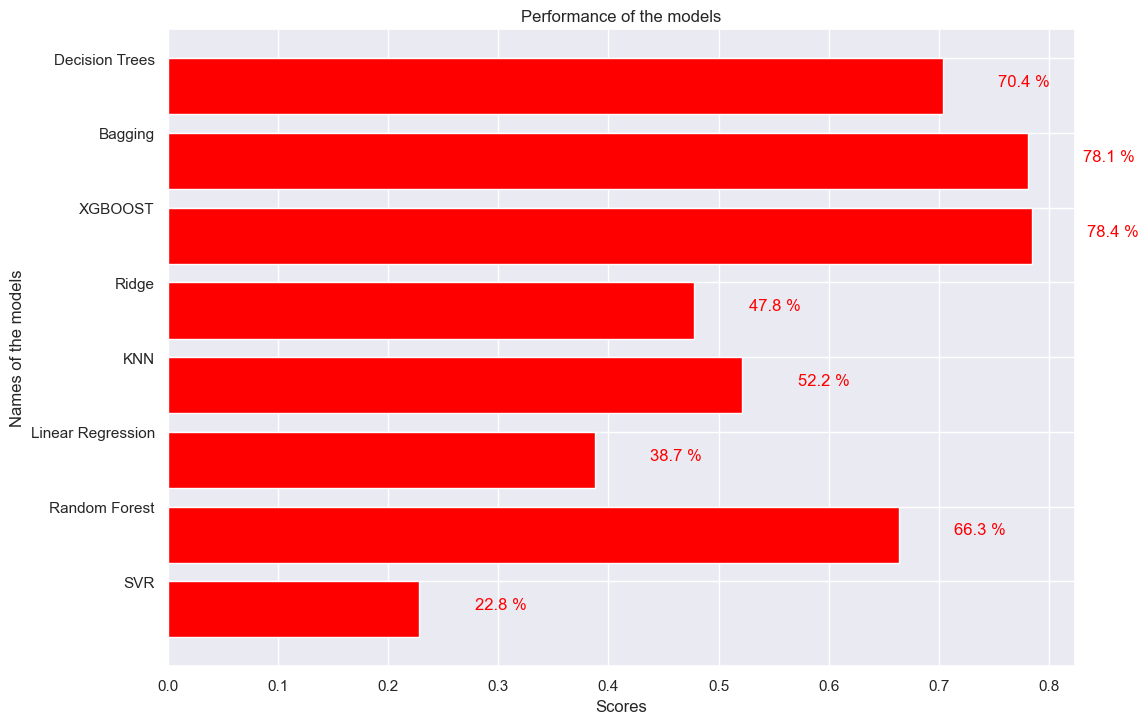

In [75]:
model_name=["SVR","Random Forest","Linear Regression","KNN","Ridge","XGBOOST","Bagging","Decision Trees"]
scores=[svr_score,rf_score,lr_score,knn_score,ridge_score,boost_score,bagging_score,tree_score]

fig, ax = plt.subplots() 
width = 0.75
ind = np.arange(len(scores))  # the x locations for the groups
ax.barh(ind, scores, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(model_name, minor=False)
for i, v in enumerate(scores):
    ax.text(v+0.05, i , str(round(v*100,1))+" %", color='red')
plt.title('title')
plt.xlabel('Scores')
plt.ylabel('Names of the models')  
plt.title('Performance of the models');
